In [56]:
import numpy as np
from math import factorial
from scipy import integrate
from plot_params import *

In [57]:
def MMn(rho, mu, n):
    def Pi_w(n, rho):
        def B(n, rho):
            B = 1
            for i in range(1, n + 1):
                B = rho * B / (i + rho * B)
            return B
        b = B(n - 1, n * rho)
        return rho * b / (1 - rho + rho * b)
    pi_w = Pi_w(n, rho)
    return pi_w / (n * mu) / (1 - rho)


def MDn(rho, mu, n):
    EW_MMn = MMn(rho, mu, n)
    C = 0
    return (C + 1) / 2 * EW_MMn

def longtail(rho, mu, n):
    # print(mu, rho)
    p = 0.25
    ux = 3
    uy = 0.75 * mu * ux / (ux - 0.25 * mu)
    C = (p * ux ** 2 + (1 - p) * p * (ux - uy) ** 2 + (1 - p) * uy ** 2) / (p * ux + (1 - p) * uy) ** 2
    EW_MMn = MMn(rho, mu, n)
    return (C + 1) / 2 * EW_MMn

def SPTF(rho, mu, upp=100):
    def integrand(x):
        return rho * np.exp(-x * mu) / (1 - (1 - np.exp(-x * mu) * (1 + x * mu)) * rho) ** 2
    I = integrate.quad(integrand, 0, upp)
    return I[0]

In [58]:
n_range = [1, 2, 4]
rho_min = 0.5
rho_max = 0.9
rho_range = np.linspace(rho_min, rho_max, 1000)
mu = 1
# then lambda = rho * mu * n

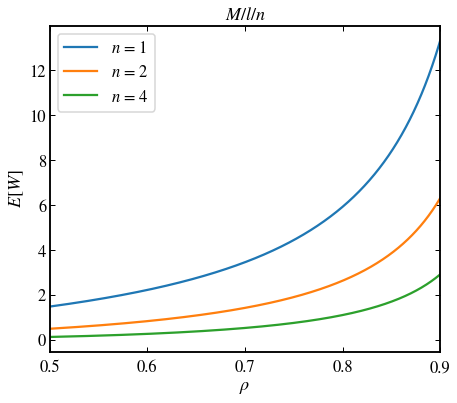

In [59]:
for n in n_range:
    y = [longtail(rho, mu, n) for rho in rho_range]
    plt.plot(rho_range, y, label=f'$n$ = {n}')
plt.legend()
plt.title('$M/l/n$')
plt.xlabel(r'$\rho$')
plt.ylabel('$E[W]$')
plt.xlim(rho_min, rho_max)
plt.show()

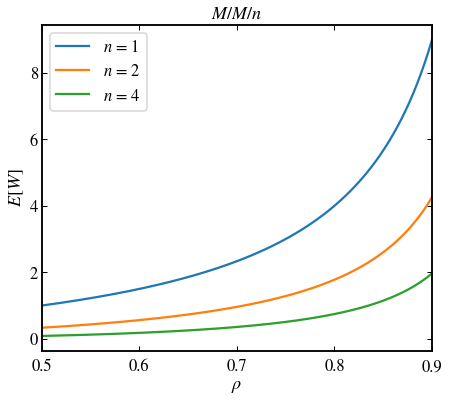

In [60]:
for n in n_range:
    y = [MMn(rho, mu, n) for rho in rho_range]
    plt.plot(rho_range, y, label=f'$n$ = {n}')
plt.legend()
plt.title('$M/M/n$')
plt.xlabel(r'$\rho$')
plt.ylabel('$E[W]$')
plt.xlim(rho_min, rho_max)
plt.show()

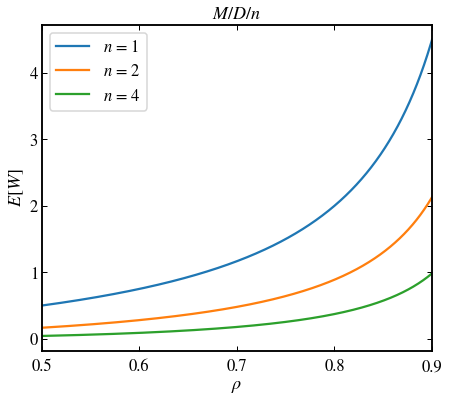

In [61]:
for n in n_range:
    y = [MDn(rho, mu, n) for rho in rho_range]
    plt.plot(rho_range, y, label=f'$n$ = {n}')
plt.legend()
plt.title('$M/D/n$')
plt.xlabel(r'$\rho$')
plt.ylabel('$E[W]$')
plt.xlim(rho_min, rho_max)
plt.show()

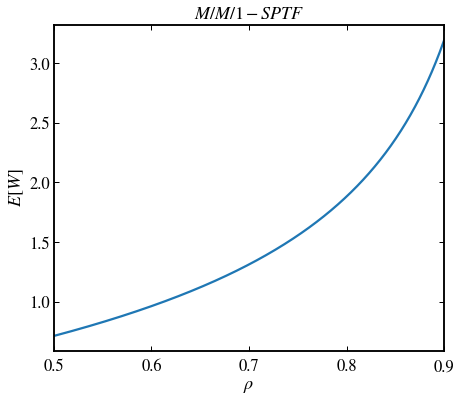

In [62]:
y = [SPTF(rho, mu) for rho in rho_range]
plt.plot(rho_range, y)
plt.title('$M/M/1 - SPTF$')
plt.xlabel(r'$\rho$')
plt.ylabel('$E[W]$')
plt.xlim(rho_min, rho_max)
plt.show()
